# Protein-rimter

In [1]:
import sys
import os
from PIL import Image
import torch
from torchvision import models
import torch.nn as nn
import pickle
from matplotlib import pyplot as plt
import pandas as pd

# Add the directory containing module (absolute path)
src_dir = "/Projects/protein-rimeter"
sys.path.append(os.path.abspath(f"{src_dir}/src"))
from data.make_dataset import prep_data
from models.train_model import train_model
from models.model_predict import predict_model_single_image

Parameter Setup

In [2]:
data_dir = f'{src_dir}/data/raw/food-101/images'
split_file_train = f'{src_dir}/data/raw/food-101/meta/train.txt'
split_file_test = f'{src_dir}/data/raw/food-101/meta/test.txt'
model_dir = f'{src_dir}/models'

classes_file = f'{src_dir}/data/raw/food-101/meta/protein.txt'
with open(classes_file, "r") as file:
    classes = file.read().splitlines()


batch_size = 32
num_epochs = 10
learning_rate = 0.001


Prepare Dataset

In [16]:
train_loader, val_loader = prep_data(data_dir, split_file_train, classes, batch_size)
test_loader = prep_data(data_dir, split_file_test, classes, batch_size)

KeyboardInterrupt: 

Train Model

In [ ]:
model = train_model(train_loader, val_loader, num_epochs, learning_rate)
torch.save(model.state_dict(), f'{model_dir}/resnet.pth')

Test Model

In [17]:
# Load trained model
model = models.resnet50(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(classes)) 
model.load_state_dict(torch.load(f'{model_dir}/resnet_2.pth'))
model.eval()  # set the model to evaluation mode

# Load label encoder
with open('../models/label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

image_path = f'{data_dir}/chicken_wings/1036790.jpg'
predicted_class = predict_model_single_image(model, image_path, label_encoder)

print(f"Prediction: {predicted_class}")

Prediction: ['chicken_wings']


Nutrional Information

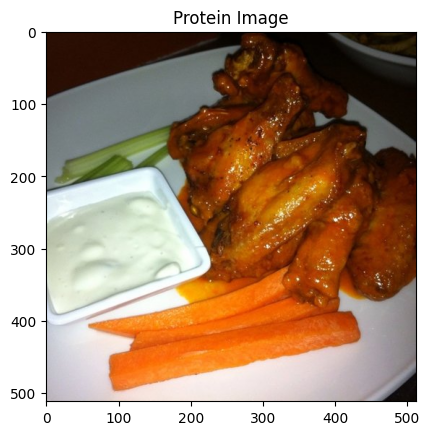

Food: Chicken Wings
Protein Content: 30.5 (g/100g)
Additional: 6.4 grams/wing


In [18]:
img = Image.open(image_path).convert('RGB')
plt.imshow(img)
plt.title("Protein Image")
plt.show()

nutritional_file = f'{src_dir}/data/raw/food-101/meta/nutritional.csv'
nutrition_df = pd.read_csv(nutritional_file)
food_info = nutrition_df[nutrition_df['class_label'] == predicted_class[0]]
print(f"Food: {food_info['name'].values[0]}")
print(f"Protein Content: {food_info['protein'].values[0]} (g/100g)")

if not(pd.isna(food_info['additional'].values[0])): 
    print(f"Additional: {food_info['additional'].values[0]}")